# IPPR Lab 8

## Name : Amanpreet Singh
## Roll No. E052
## Class : BTech CSBS

In [1]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from skimage.color import rgb2gray, rgba2rgb
import cv2

In [2]:
image = io.imread('letter_j.JPG')

In [3]:
image.shape

(151, 110, 3)

In [4]:
#Convert rgb image to gray image
image=rgb2gray(image)

In [5]:
sh=image.shape
sh

(151, 110)

In [6]:
image = image*255

In [7]:
image[60,50]

255.0

In [8]:
rows = sh[0]
cols = sh[1]

In [9]:
th=180
image1 = image.copy()
rows = sh[0]
cols = sh[1]
for r in range(rows):
    for c in range(cols):
        if image1[r][c] > th:
              image1[r][c] = 255
        else: 
            image1[r][c]=0

Text(0.5, 1.0, 'Thresholded Image')

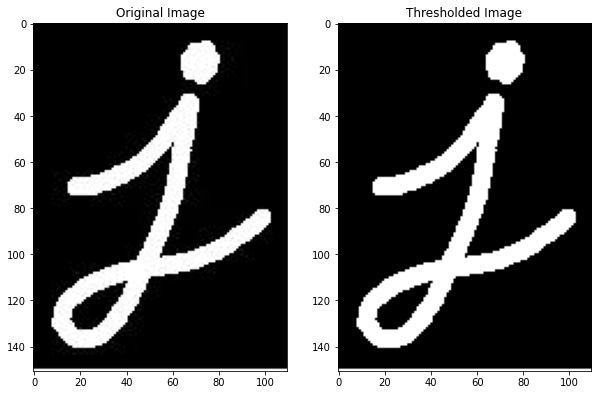

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(image1, cmap = 'gray')
plt.title('Thresholded Image')

In [11]:
img_sk = np.zeros((rows,cols))
img_sk

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
se = cv2.getStructuringElement(cv2.MORPH_CROSS,(7,7))
se

array([[0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0]], dtype=uint8)

In [13]:
img_open = cv2.morphologyEx(image1,cv2.MORPH_OPEN,se) 
img_temp = cv2.subtract(image1,img_open) # subtract open image from eroded image
img_erode = cv2.erode(image1,se)

In [14]:
# Image union(bitwise-OR)
for r in range(rows):
    for c in range(cols):
        if img_sk[r,c] == 0 and img_temp[r,c] == 0:
            img_sk[r,c]=0
        else:
            img_sk[r,c] = 255

In [15]:
image1 = img_erode.copy()

Text(0.5, 1.0, 'Skeletonized Image')

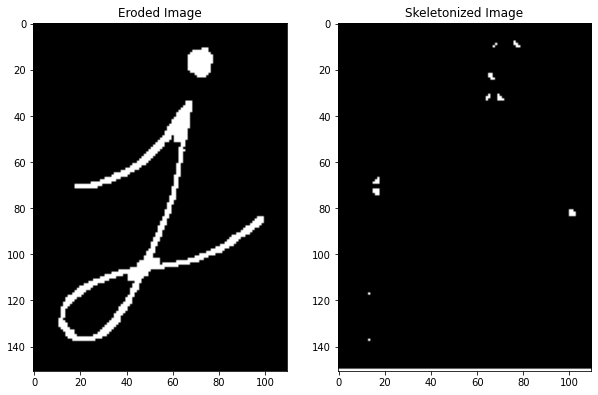

In [16]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_erode, cmap = 'gray')
plt.title('Eroded Image')
plt.subplot(1,2,2)
plt.imshow(img_sk, cmap = 'gray')
plt.title('Skeletonized Image')

In [17]:
# k=2
img_open = cv2.morphologyEx(image1,cv2.MORPH_OPEN,se) 
img_temp = cv2.subtract(image1,img_open) # subtract open image from eroded image
img_erode = cv2.erode(image1,se)

# Image union(bitwise-OR)
for r in range(rows):
    for c in range(cols):
        if img_sk[r,c] == 0 and img_temp[r,c] == 0:
            img_sk[r,c]=0
        else:
            img_sk[r,c] = 255

Text(0.5, 1.0, 'Skeletonized Image')

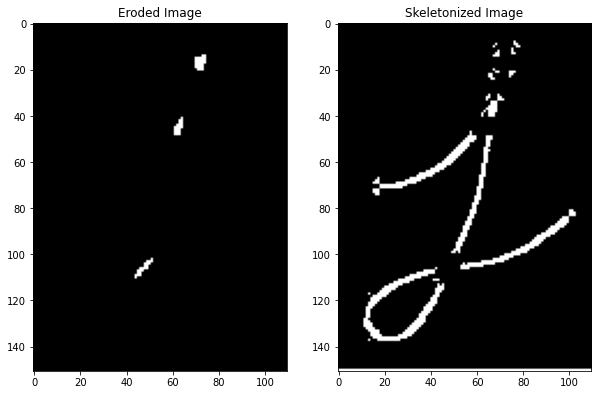

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_erode, cmap = 'gray')
plt.title('Eroded Image')
plt.subplot(1,2,2)
plt.imshow(img_sk, cmap = 'gray')
plt.title('Skeletonized Image')

In [19]:
image1 = img_erode.copy()

In [20]:
# k=3
img_open = cv2.morphologyEx(image1,cv2.MORPH_OPEN,se) 
img_temp = cv2.subtract(image1,img_open) # subtract open image from eroded image
img_erode = cv2.erode(image1,se)

# Image union(bitwise-OR)
for r in range(rows):
    for c in range(cols):
        if img_sk[r,c] == 0 and img_temp[r,c] == 0:
            img_sk[r,c]=0
        else:
            img_sk[r,c] = 255

Text(0.5, 1.0, 'Skeletonized Image')

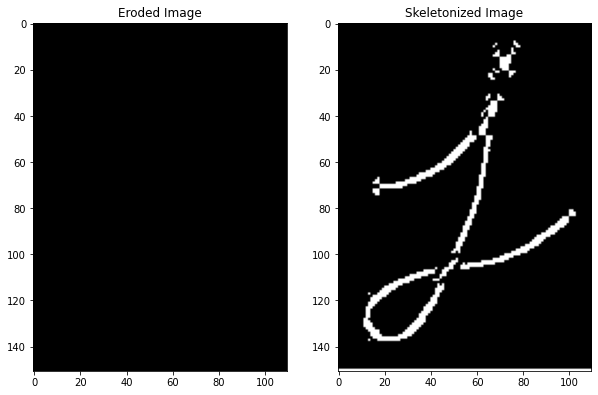

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(img_erode, cmap = 'gray')
plt.title('Eroded Image')
plt.subplot(1,2,2)
plt.imshow(img_sk, cmap = 'gray')
plt.title('Skeletonized Image')

Text(0.5, 1.0, 'Skeletonized Image')

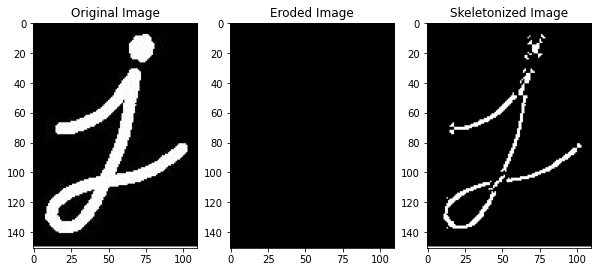

In [29]:
# Subplot- Original, Eroded and Skeletonized
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(1,3,2)
plt.imshow(img_erode, cmap = 'gray')
plt.title('Eroded Image')
plt.subplot(1,3,3)
plt.imshow(img_sk, cmap = 'gray')
plt.title('Skeletonized Image')

# Conclusion
- Given color image is thresholded to convert to binary image with pixel value 0 or 255.
- 3x3 cross type of structuring element is used to skeletonize the given image.
- The above process required 9 iterations to get the skeleton of the given image.
- If size of the structuring element is increased to 7x7, the process converges faster and the required number of iterations reduced to 3.
- However, skeleton of the image is thicker for large structuring element which loses the finer details of the image.